In [ ]:
!pip install -U transformers
!pip install -U sentencepiece
!pip install -U sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 21.2 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
import pandas as pd

In [ ]:
classifier = pipeline("text-classification", model ="SamLowe/roberta-base-go_emotions")

text = "i love you"
outputs = classifier = classifier(text)
pd.DataFrame(outputs)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0


,label,score
0,love,0.948162


## Named Entity Recognition

In [11]:
ner_tagger = pipeline("ner", aggregation_strategy="simple", model ="dslim/bert-base-NER")

text = "My Name is Meher , and i work for CRIL laboratory"

outputs_ner = ner_tagger(text)
pd.DataFrame(outputs_ner)



config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


,entity_group,score,word,start,end
0,PER,0.866889,Meher,11,16
1,ORG,0.990489,CRIL,34,38


## Question Answering

In [28]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="ahotrod/electra_large_discriminator_squad2_512")

text = """
Dear Amazon, last week I ordered an Optimus Prime action figure from your
online store in India. Unfortunately when I opened the package, I discovered to
my horror that I had been sent an action figure of Megatron instead!
"""

question = "from where did I placed order?"

outputs = pipe(question=question, context=text)
pd.DataFrame([outputs])

Device set to use cuda:0


,score,start,end,answer
0,0.190134,6,12,Amazon


## Summarization

In [30]:
text = """
Dear Amazon, last week I ordered an Optimus Prime action figure from your
online store in India. Unfortunately when I opened the package, I discovered to
my horror that I had been sent an action figure of Megatron instead!
"""

In [31]:
summarizer = pipeline("summarization")

outputs = summarizer(text)
outputs

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your max_length is set to 142, but your input_length is only 51. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=25)


[{'summary_text': ' Amazon sent an Optimus Prime action figure from your online store in India . Unfortunately when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! Amazon.com has been sending a figure of Optimus Prime instead of Optimus Optimus Prime .'}]

In [34]:
outputs[0]['summary_text'][len(text):]

'sending a figure of Optimus Prime instead of Optimus Optimus Prime .'

In [42]:
summarizer = pipeline("summarization" , model="Falconsai/text_summarization")

ARTICLE = """
Hugging Face: Revolutionizing Natural Language Processing
Introduction
In the rapidly evolving field of Natural Language Processing (NLP), Hugging Face has emerged as a prominent and innovative force. This article will explore the story and significance of Hugging Face, a company that has made remarkable contributions to NLP and AI as a whole. From its inception to its role in democratizing AI, Hugging Face has left an indelible mark on the industry.
The Birth of Hugging Face
Hugging Face was founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf. The name "Hugging Face" was chosen to reflect the company's mission of making AI models more accessible and friendly to humans, much like a comforting hug. Initially, they began as a chatbot company but later shifted their focus to NLP, driven by their belief in the transformative potential of this technology.
Transformative Innovations
Hugging Face is best known for its open-source contributions, particularly the "Transformers" library. This library has become the de facto standard for NLP and enables researchers, developers, and organizations to easily access and utilize state-of-the-art pre-trained language models, such as BERT, GPT-3, and more. These models have countless applications, from chatbots and virtual assistants to language translation and sentiment analysis.
Key Contributions:
1. **Transformers Library:** The Transformers library provides a unified interface for more than 50 pre-trained models, simplifying the development of NLP applications. It allows users to fine-tune these models for specific tasks, making it accessible to a wider audience.
2. **Model Hub:** Hugging Face's Model Hub is a treasure trove of pre-trained models, making it simple for anyone to access, experiment with, and fine-tune models. Researchers and developers around the world can collaborate and share their models through this platform.
3. **Hugging Face Transformers Community:** Hugging Face has fostered a vibrant online community where developers, researchers, and AI enthusiasts can share their knowledge, code, and insights. This collaborative spirit has accelerated the growth of NLP.
Democratizing AI
Hugging Face's most significant impact has been the democratization of AI and NLP. Their commitment to open-source development has made powerful AI models accessible to individuals, startups, and established organizations. This approach contrasts with the traditional proprietary AI model market, which often limits access to those with substantial resources.
By providing open-source models and tools, Hugging Face has empowered a diverse array of users to innovate and create their own NLP applications. This shift has fostered inclusivity, allowing a broader range of voices to contribute to AI research and development.
Industry Adoption
The success and impact of Hugging Face are evident in its widespread adoption. Numerous companies and institutions, from startups to tech giants, leverage Hugging Face's technology for their AI applications. This includes industries as varied as healthcare, finance, and entertainment, showcasing the versatility of NLP and Hugging Face's contributions.
Future Directions
Hugging Face's journey is far from over. As of my last knowledge update in September 2021, the company was actively pursuing research into ethical AI, bias reduction in models, and more. Given their track record of innovation and commitment to the AI community, it is likely that they will continue to lead in ethical AI development and promote responsible use of NLP technologies.
Conclusion
Hugging Face's story is one of transformation, collaboration, and empowerment. Their open-source contributions have reshaped the NLP landscape and democratized access to AI. As they continue to push the boundaries of AI research, we can expect Hugging Face to remain at the forefront of innovation, contributing to a more inclusive and ethical AI future. Their journey reminds us that the power of open-source collaboration can lead to groundbreaking advancements in technology and bring AI within the reach of many.
"""


outputs = summarizer(ARTICLE)
outputs

Device set to use cuda:0
Token indices sequence length is longer than the specified maximum sequence length for this model (851 > 512). Running this sequence through the model will result in indexing errors


[{'summary_text': 'Hugging Face has emerged as a prominent and innovative force in NLP . From its inception to its role in democratizing AI, the company has left an indelible mark on the industry . The name "Hugging Face" was chosen to reflect the company\'s mission of making AI models more accessible and friendly to humans .'}]

## Text Generation Pipeline

In [44]:
text = """
Dear Amazon, last week I ordered an Optimus Prime action figure from your
online store in India. Unfortunately when I opened the package, I discovered to
my horror that I had been sent an action figure of Megatron instead!
"""

In [55]:
generator = pipeline("text-generation")

response = "I am sorry to hear that your order was mixed up"

prompt = "user: " + text.replace("\n"," ") +"Customer Service Response: " + response
outputs = generator(prompt)


No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [56]:
outputs

[{'generated_text': 'user:  Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in India. Unfortunately when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! Customer Service Response: I am sorry to hear that your order was mixed up with the shipment date of India based on the shipping date that you provided. Unfortunately, I have tried to contact you and have received no response. Please contact me if you have any further questions or concerns. Please allow me to update you as soon as possible. If you would like to make your purchase online, please contact me through your Amazon affiliate link. Thank you for your patience. Thank you, Dear Customer Service. I hope this helps clear up any confusion or confusion that may exist over our order process. If you have any questions, please ask in the comments section below. Sincerely,\n\nAmazon.com, Inc.\n\nCustomer Service\n\n\nDear Customer Service: 

In [61]:
generator = pipeline("text-generation", model="gpt2-large")

response = "I am sorry to hear that your order was mixed up"

#prompt = "user: " + text.replace("\n"," ") +"Customer Service Response: " + response
prompt = "There was a lion"
outputs = generator(prompt)


Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [62]:
outputs

[{'generated_text': "There was a lion in the living room, a cat and a dog in the backyard.\n\nThe girl said she was told the lion was hers and the cat belonged to someone else.\n\nA neighbor said the cats were well cared for and had an abundance of food and water.\n\nThe girl's mother was also taken to the hospital with her injuries.\n\nThe animals were taken to the nearby Animal Care and Control Center for the treatment of their injuries.\n\nThe cause of the attack was not yet known."}]

## Translation

In [70]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-de")

Device set to use cuda:0


In [71]:
outputs = translator(text)
outputs

[{'translation_text': 'Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur in Ihrem Online-Shop in Indien bestellt. Leider als ich das Paket öffnete, entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von Megatron geschickt worden war!'}]

## Image Classification pipeline

In [73]:
from PIL import Image
import requests
from transformers import pipeline

In [80]:
url = "https://media.istockphoto.com/id/992637094/fr/photo/chat-british-poil-court-et-golden-retriever.jpg?s=2048x2048&w=is&k=20&c=caKnidFBwH0Fct3MA8Pv3CVBWjcSOrniuQKVgCgyT20="

image = Image.open(requests.get(url, stream=True).raw)


In [81]:
classifier = pipeline("image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


In [82]:
output = classifier(image)
output

[{'label': 'golden retriever', 'score': 0.40138858556747437},
 {'label': 'Sussex spaniel', 'score': 0.048948176205158234},
 {'label': 'Saint Bernard, St Bernard', 'score': 0.04650852456688881},
 {'label': 'cocker spaniel, English cocker spaniel, cocker',
  'score': 0.0446600615978241},
 {'label': 'muzzle', 'score': 0.03254186734557152}]

In [88]:
url = "https://imgs.search.brave.com/ZSTgS0eaNczlmky2u5Jh7rWlO4Ir0MGJV8DQsT1zr5U/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9zdGF0/aWMudmVjdGVlenku/Y29tL3N5c3RlbS9y/ZXNvdXJjZXMvdGh1/bWJuYWlscy8wMDMv/MzYzLzQ0MS9zbWFs/bC9wb3J0cmFpdC1v/Zi1oYW5kc29tZS1n/dXktc21pbGluZy1p/bi10aGUtYXV0dW1u/LXBhcmstZnJlZS1w/aG90by5qcGc"

image = Image.open(requests.get(url, stream=True).raw)

classifier = pipeline("image-classification", model ="nateraw/vit-age-classifier")

output = classifier(image)
output



Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


[{'label': '20-29', 'score': 0.7495364546775818},
 {'label': '30-39', 'score': 0.20421236753463745},
 {'label': '10-19', 'score': 0.03353656083345413},
 {'label': '40-49', 'score': 0.012032690457999706},
 {'label': '50-59', 'score': 0.00042199515155516565}]

## Image segmentation

In [90]:
url = "https://imgs.search.brave.com/ZSTgS0eaNczlmky2u5Jh7rWlO4Ir0MGJV8DQsT1zr5U/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9zdGF0/aWMudmVjdGVlenku/Y29tL3N5c3RlbS9y/ZXNvdXJjZXMvdGh1/bWJuYWlscy8wMDMv/MzYzLzQ0MS9zbWFs/bC9wb3J0cmFpdC1v/Zi1oYW5kc29tZS1n/dXktc21pbGluZy1p/bi10aGUtYXV0dW1u/LXBhcmstZnJlZS1w/aG90by5qcGc"

image = Image.open(requests.get(url, stream=True).raw)

In [91]:
segmenter = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")

outputs = segmenter(image)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/109M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)
Device set to use cuda:0


In [92]:
outputs

[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=525x350>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=525x350>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=525x350>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=525x350>},
 {'score': None,
  'label': 'Bag',
  'mask': <PIL.Image.Image image mode=L size=525x350>}]

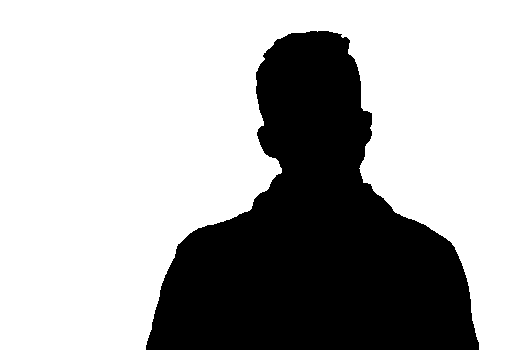

In [93]:
outputs[0]['mask']

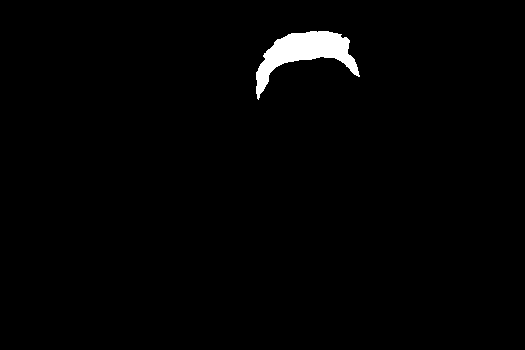

In [94]:
outputs[1]['mask']

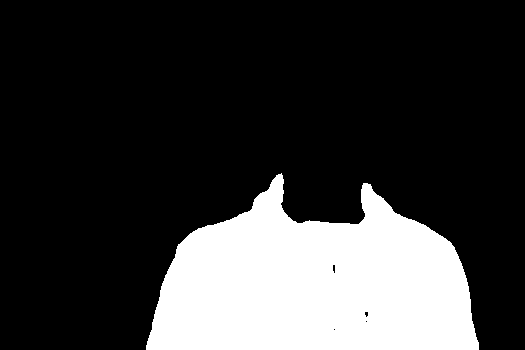

In [95]:
outputs[2]['mask']

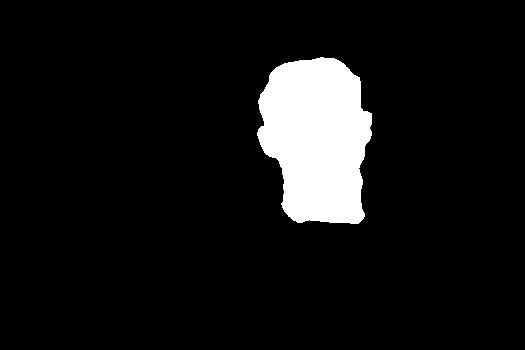

In [96]:
outputs[3]['mask']

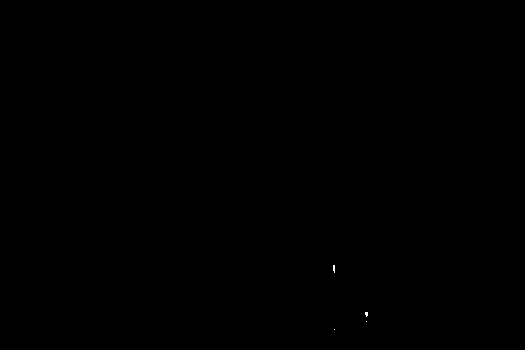

In [97]:
outputs[4]['mask']

## Text to speech

In [98]:
import transformers
transformers.__version__

'4.57.1'

In [99]:
import soundfile as sf


In [103]:
text = """

A Cloudflare spokesperson said the company observed a “spike in unusual traffic” to one of its services around 6:20 a.m. ET, causing some traffic passing through its network to experience errors.
“We do not yet know the cause of the spike in unusual traffic,” the spokesperson added. “We are all hands on deck to make sure all traffic is served without errors.”

"""

In [100]:
synth = pipeline("text-to-speech")


No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


In [104]:
speech = synth(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [105]:
sf.write("speech2.wav", speech["audio"].T, samplerate=speech['sampling_rate'])

## Music Generation

In [ ]:
synth =